# Load and Clean the Data

In [1]:
import pycountry
import pandas as pd
import numpy as np
import os
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib as mpl
import folium
import json

In [52]:
# Read in the data set
df = pd.read_csv('data.csv')

# Remove NaN values (there were not too many)
df = df.dropna()

# Drop the position column
df['Position'] = None

# Format Track Name column to Trackname
df = df.rename(index=str, columns={"Track Name": "Trackname"})

# Change date column to date type
df['Date'] = pd.to_datetime(df['Date'])

# Filter dates for only 2017
df = df[(df['Date'] >= '2017-01-01') & (df['Date'] <= '2017-12-31')]

# Convert country abbreviations to full names
df['Region'] = df['Region'].str.upper()

def convert_region(region):
    if region == 'GLOBAL':
        return region.title()
    return pycountry.countries.get(alpha2=region).name

df['Region'] = df['Region'].apply(convert_region)

# Fix country names
df = df.replace({'Bolivia, Plurinational State of':'Bolivia', 'United States':'United States of America',
                                'Taiwan, Province of China':'Taiwan'})

# Create an artist_trackname feature for machine learning
df['Artist_Trackname'] = df['Artist'] + ' ' + df['Trackname']

# Add country groupings
with open('regions.json') as json_data:
    regions = json.load(json_data)    

df['Group'] = df['Region'].replace(regions)

# Overview of 2017

### Top 100 Spotify Streamed Songs in the World

Ed Sheeran's Shape of You was streamed almost 3 billion times

In [53]:
pd.set_option('display.max_rows', 100)
top100 = df.groupby(['Trackname', 'Artist'], as_index=False)[['Streams']].sum().sort_values(by='Streams', ascending=False)[0:100].reset_index()
top100

,index,Trackname,Artist,Streams
0,13618,Shape of You,Ed Sheeran,2954314942
1,3538,Despacito - Remix,Luis Fonsi,1808988398
2,3537,Despacito (Featuring Daddy Yankee),Luis Fonsi,1449083311
3,14174,Something Just Like This,The Chainsmokers,1366414897
4,5877,HUMBLE.,Kendrick Lamar,1288359986
5,16098,Unforgettable,French Montana,1265161586
6,6948,I'm the One,DJ Khaled,1241605052
7,17707,rockstar,Post Malone,1186411578
8,7302,It Ain't Me (with Selena Gomez),Kygo,1179203261
9,17239,XO TOUR Llif3,Lil Uzi Vert,1145302505


## Number of Hits Each Artist Has in the Top 100

Ed Sheeran had five songs out of the 100 most played songs in the data set!

In [54]:
hits = top100.groupby('Artist')['Artist'].agg('count').sort_values(ascending=False)
hits = pd.DataFrame({'Artist':hits.index, 'Hits':hits.values})
hits

,Artist,Hits
0,Ed Sheeran,5
1,Maroon 5,3
2,Drake,3
3,The Chainsmokers,3
4,Clean Bandit,2
5,Bruno Mars,2
6,DJ Khaled,2
7,Martin Garrix,2
8,Post Malone,2
9,Khalid,2


# Most Streamed Song by Country

Ed Sheeran's Shape of You tends to be the most streamed song by country except in Latin America

In [55]:
total_plays_by_country = df.groupby(['Artist','Trackname', 'Region'], as_index=False)['Streams'].sum()

def top_song(group):
    group.sum()

total_plays_by_country = total_plays_by_country[total_plays_by_country.groupby('Region')['Streams'].transform('max') 
                       == total_plays_by_country['Streams']].sort_values('Streams', ascending=False).reset_index()

total_plays_by_country[['Region', 'Artist', 'Trackname', 'Streams']]

,Region,Artist,Trackname,Streams
0,Global,Ed Sheeran,Shape of You,1470919913
1,United States of America,Kendrick Lamar,HUMBLE.,334342280
2,United Kingdom,Ed Sheeran,Shape of You,130658891
3,Mexico,Danny Ocean,Me Rehúso,127468959
4,Germany,Ed Sheeran,Shape of You,96505235
5,Brazil,Ed Sheeran,Shape of You,95996545
6,Spain,Luis Fonsi,Despacito (Featuring Daddy Yankee),76135182
7,Sweden,Ed Sheeran,Shape of You,63184448
8,Philippines,Ed Sheeran,Shape of You,57245668
9,Netherlands,Ed Sheeran,Shape of You,55512591


# International vs Local Artists

### Analyzing Singers that Appeared in All Countries in the Data Set

This section looks for artists that only appear in a single country. The idea is to look at how globalized pop music has become. 

Here are the total number of artists that appear in only one country

In [56]:
country_counts = df[['Region', 'Artist']].drop_duplicates().groupby('Artist', as_index=False).count()
country_counts = country_counts.rename(columns = {"Region":"Numcountries"})
local_artists = country_counts[country_counts['Numcountries'] == 1].count()
local_artists['Artist']

4388

And here are the total number of artists in the data set.

In [57]:
total_artists = country_counts['Artist'].drop_duplicates().count()
total_artists

6521

So the percentage of artists in the data set that are local to one country is

In [58]:
percent_local = 100*local_artists/total_artists
percent_local['Artist']

67.29029289986198

Now let's look at this same statistic by country. What percentage of the artists in each country are completely local; in other words, the artist only appears in one country. It turns out that Japan has the most local artists. About 50% of the artists who made it into the top 200 are local to Japan. Japan, Turkey, Scandinavian countries, and Brazil seem to have more local artist success on Spotify.

In [59]:
artist_by_country = df[['Region', 'Artist']].drop_duplicates()
artist_by_country['Numcountries'] = artist_by_country.groupby('Artist')['Artist'].transform('count')

In [60]:
total_local_artists = artist_by_country[artist_by_country['Numcountries'] == 1].groupby('Region').count()
total_artists = artist_by_country.groupby('Region').count()
artist_by_country['dummy'] = artist_by_country['Numcountries'] > 1
artist_by_country = artist_by_country.groupby(['Region','dummy'], as_index=False).count()
del artist_by_country['Artist']
artist_by_country['total'] = artist_by_country.groupby('Region', as_index=False)['Numcountries'].transform('sum')

In [61]:
artist_by_country['percent'] = 100*artist_by_country['Numcountries'] / artist_by_country['total']

In [62]:
artist_by_country = artist_by_country[artist_by_country['dummy'] == False].sort_values('percent', ascending=False)
artist_by_country

,Region,dummy,Numcountries,total,percent
57,Japan,False,307,611,50.245499
98,Turkey,False,221,462,47.835498
96,Taiwan,False,480,1054,45.540797
32,Finland,False,320,709,45.133992
10,Brazil,False,106,296,35.810811
92,Sweden,False,298,867,34.371396
55,Italy,False,166,518,32.046332
49,Iceland,False,107,345,31.014493
22,Denmark,False,188,620,30.322581
68,Netherlands,False,189,634,29.810726


In [63]:
country_geo = os.path.join('world-countries.json')

# state_unemployment = os.path.join('data', 'US_Unemployment_Oct2012.csv')
# state_data = pd.read_csv(state_unemployment)

m = folium.Map(location=[0, 0], zoom_start=1)

m.choropleth(
    geo_data=country_geo,
    name='choropleth',
    data=artist_by_country,
    columns=['Region', 'percent'],
    key_on='properties.name',
    fill_color='BuPu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Percent of Artists who are Local'
)


folium.LayerControl().add_to(m)

m

# Clustering 

Here is some unsupervised learning analysis. Each song in the data set will be a feature. The value will be the percentage of plays for each song by country. Like the percentage of plays in Argentina that were for Despacito.

We can see if certain countries tend to cluster together.

In [64]:
cluster = df.copy()
cluster['Total_Song_Plays'] = cluster.groupby(['Region', 'Artist_Trackname'])['Streams'].transform('sum')
cluster['Total_Plays'] = cluster.groupby(['Region'])['Streams'].transform('sum')
cluster = cluster[['Artist_Trackname', 'Total_Song_Plays', 'Total_Plays', 'Region']].drop_duplicates()
cluster['Percent_Plays'] = cluster['Total_Song_Plays'] / cluster['Total_Plays']
cluster = cluster.pivot(index='Region', columns='Artist_Trackname', values='Percent_Plays')
cluster = cluster.fillna(0)
cluster.head()

Artist_Trackname,#TocoParaVos Bailemos juntos,#TocoParaVos Enganchado #TocoParaVos - Cumbia Mix,#TocoParaVos Hasta la luna,#TocoParaVos Me provoca (Noche loca),#TocoParaVos Su fiel admirador,#TocoParaVos Sólo necesito,#TocoParaVos Tan infinito,#TocoParaVos Tengo un vicio,#TocoParaVos Tu beso y tu piel (feat. Gustas Mio),#TocoParaVos Uh amor (feat. Lionel Ferro),...,黃義達 到底多久,黃義達 匿名的寶貝,黃義達 每天的每夜,黃聖萊Lex 看好,黃荻鈞 半年,黄靖伦 我會一直記得,黄靖伦 舊傷,鼓鼓 為愛而愛,齊晨 到此為止,龔詩嘉 My Island Home
Region,,,,,,,,,,,,,,,,,,,,,
Argentina,0.0,0.000015,0.000797,0.0,0.0,0.000005,0.0,0.0,0.000005,0.000005,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Australia,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Austria,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Belgium,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bolivia,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


This first chart runs PCA on the features to be able to visualize the features in two dimensions. Although the visualizaiton is a bit crowded, it looks logical to divide the data into two or three clusters. It's clear that Latin American Spanish speaking countries have similar characteristics and are clustered together. Arguably there is also an Eastern European cluster of some sort.

In [65]:
pca = PCA(n_components=2)
pca_features = pca.fit_transform(cluster)
countries = cluster.index
pca_results = pd.DataFrame(pca_features, columns=['f1', 'f2'])
pca_results['country'] = countries

Text(0.5,1,'PCA two-dimensional features')

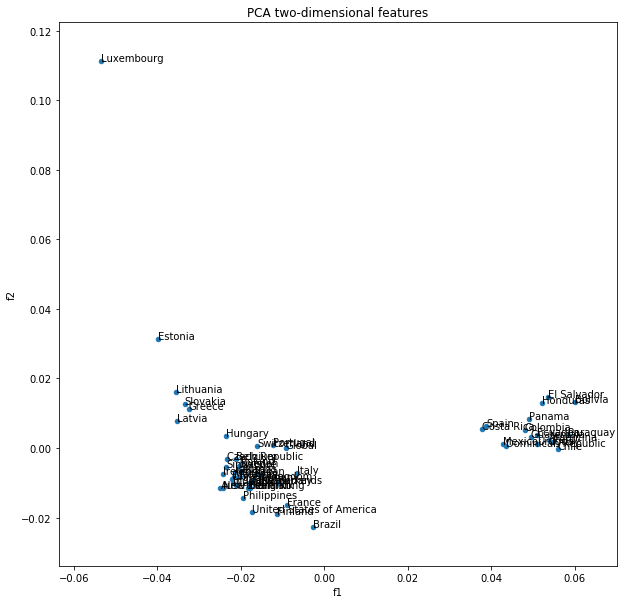

In [66]:
mpl.rcParams['figure.figsize'] = (10, 10)

ax = pca_results.plot('f1', 'f2', kind='scatter')
pca_results[['f1','f2','country']].apply(lambda x: ax.text(*x),axis=1);
plt.title('PCA two-dimensional features')

Let's zoom in a bit more

In [67]:
groupA = pca_results[pca_results['f1'] > .03] # Latin America
groupB = pca_results[(pca_results['f2'] <= 0.005) & (pca_results['f1'] < .03)]
groupC = pca_results[(pca_results['f2'] > 0.005) & (pca_results['f1'] < .03)]

Text(0.5,1,'Spanish Speaking Countries \n Cluster Together')

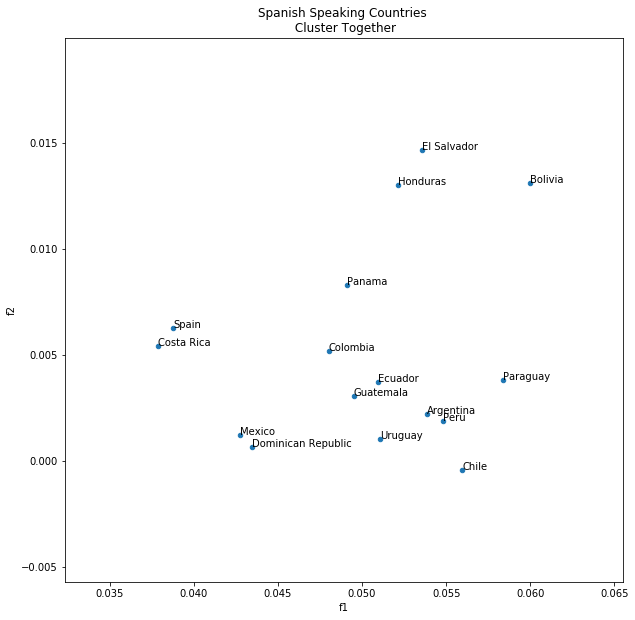

In [68]:
ax = groupA.plot('f1', 'f2', kind='scatter')
groupA[['f1','f2','country']].apply(lambda x: ax.text(*x),axis=1);
plt.title('Spanish Speaking Countries \n Cluster Together')

Text(0.5,1,'Main Cluster')

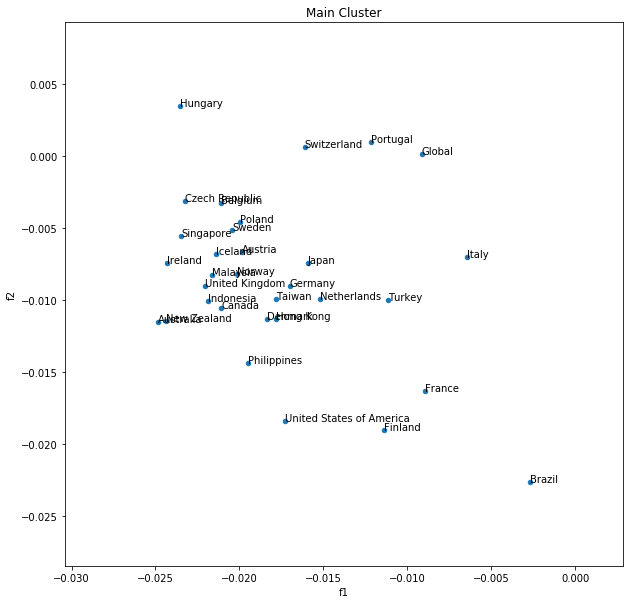

In [69]:
ax = groupB.plot('f1', 'f2', kind='scatter')
groupB[['f1','f2','country']].apply(lambda x: ax.text(*x),axis=1);
plt.title('Main Cluster')

Text(0.5,1,'Small Cluster')

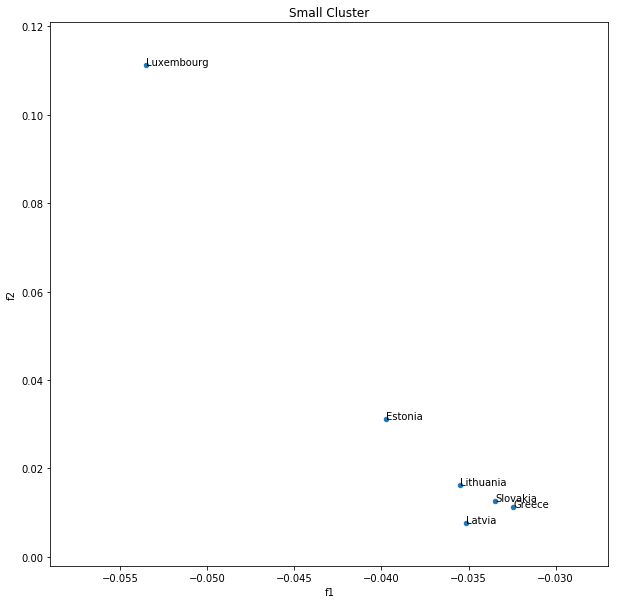

In [70]:
ax = groupC.plot('f1', 'f2', kind='scatter')
groupC[['f1','f2','country']].apply(lambda x: ax.text(*x),axis=1);
plt.title('Small Cluster')

# Trends Over Time

This last section will look out how song plays trend out over time. This will be a function where you can input a song and then see how the popularity trended over time

In [71]:
song = 'Shape of You'
artist = 'Ed Sheeran'
def song_artist_filter(song, artist, df):
    return df[(df['Trackname'] == 'Shape of You') & (df['Artist'] == 'Ed Sheeran')]

song_time = song_artist_filter(song, artist, df)

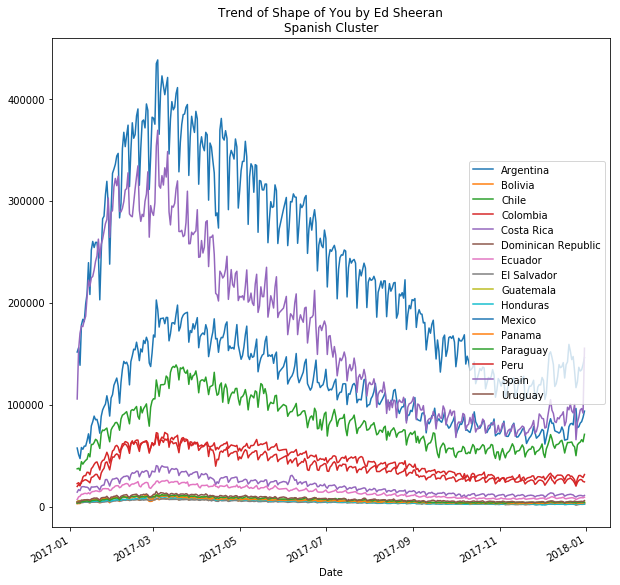

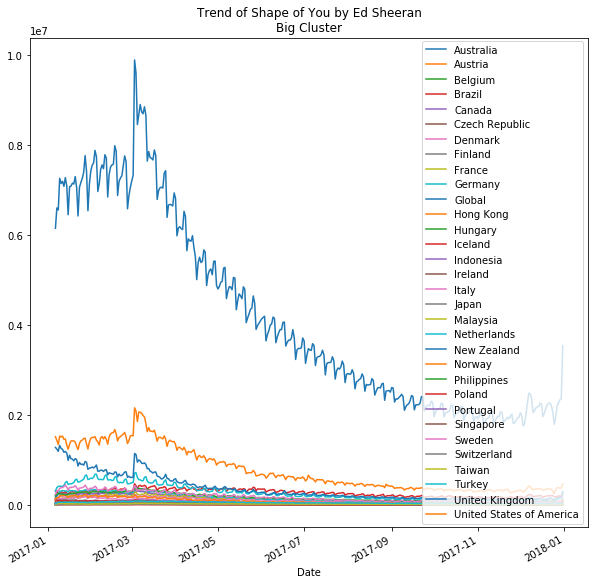

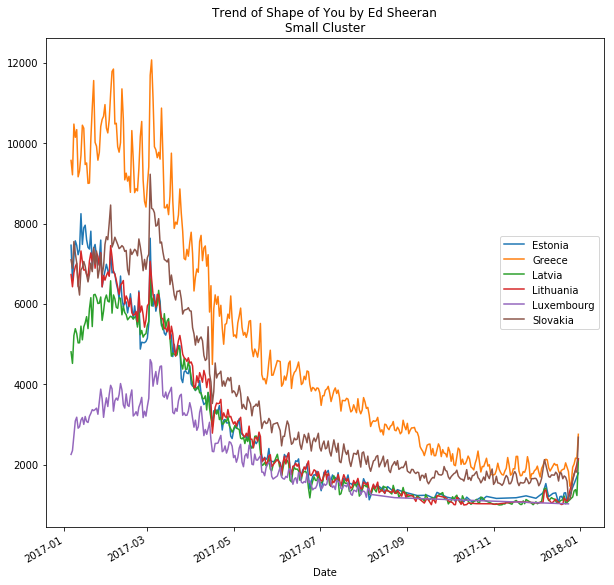

In [72]:
def plot_time_series(cluster, cluster_name, data):
    fig, ax = plt.subplots()

    for key, grp in data[data['Region'].isin(cluster['country'])].groupby(['Region']):
        ax = grp.plot(ax=ax, kind='line', x='Date', y='Streams', label=key)

    plt.legend(loc='right')
    plt.title('Trend of ' + song + ' ' + 'by ' + artist + '\n' + cluster_name)
    plt.show()
    
plot_time_series(groupA, 'Spanish Cluster', song_time)
plot_time_series(groupB, 'Big Cluster', song_time)
plot_time_series(groupC,  'Small Cluster', song_time)

To be able to compare countries more easily, the data should be normalized by the total number of players for each song by country

In [73]:
def normalize_data(data_frame):
    data_frame = data_frame.copy()
    data_frame['TotalStreams'] = data_frame['Streams'].groupby(data_frame['Region']).transform('sum')
    data_frame['Percent'] = data_frame['Streams'] / data_frame['TotalStreams']
    return data_frame

def plot_time_series_normalized(cluster, cluster_name, data):
    fig, ax = plt.subplots()

    for key, grp in data[data['Region'].isin(cluster['country'])].groupby(['Region']):
        ax = grp.plot(ax=ax, kind='line', x='Date', y='Percent', label=key)

    plt.legend(loc='right')
    plt.title('Trend of ' + song + ' ' + 'by ' + artist + '\n' + cluster_name)
    plt.show()

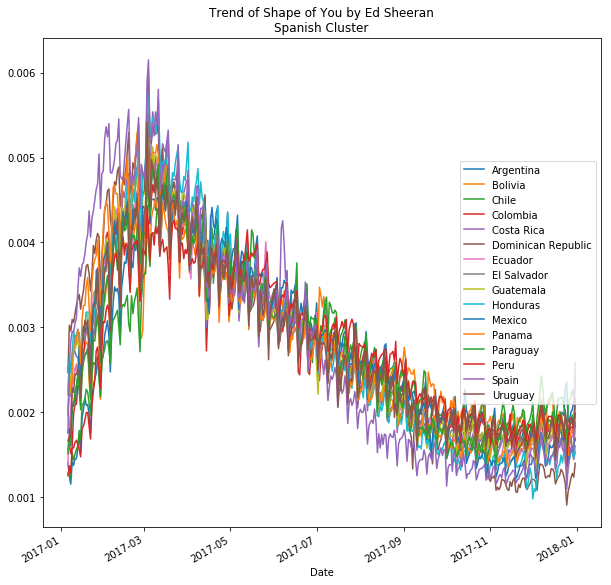

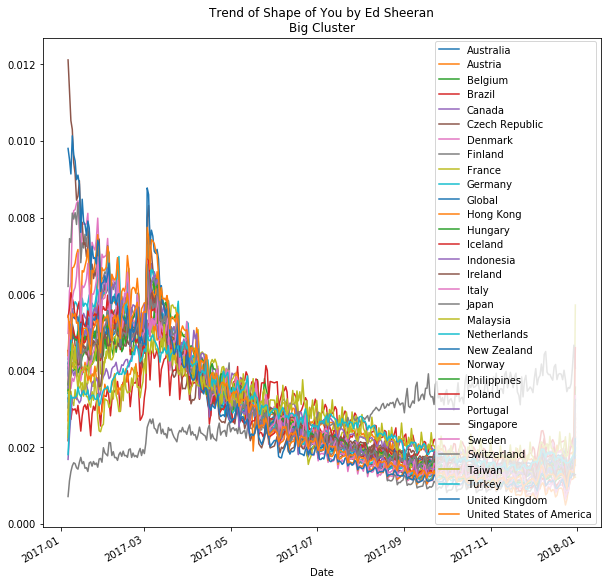

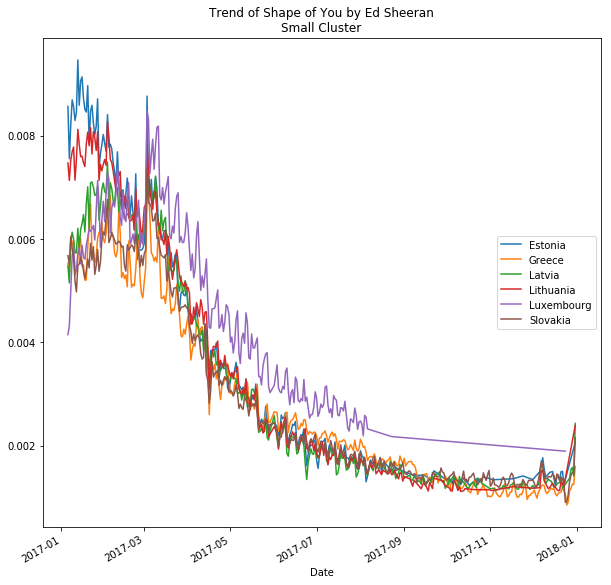

In [74]:
normalized_song_time = normalize_data(song_time)
plot_time_series_normalized(groupA, 'Spanish Cluster', normalized_song_time)
plot_time_series_normalized(groupB, 'Big Cluster', normalized_song_time)
plot_time_series_normalized(groupC,  'Small Cluster', normalized_song_time)

Rank the countries by when Ed Sheeran's Shape of You reached peak. This might give insight into how the song traveled across the world. The song started in the lighter colored countries and reached peak later in the darker shaded countries.

In [75]:
peak_dates = song_time[song_time.groupby(['Region'])['Streams'].transform('max') == song_time['Streams']].sort_values('Date')
peak_dates = peak_dates[['Artist', 'Trackname', 'Region', 'Date', 'Streams']].sort_values('Date').reset_index()
peak_dates['Rank'] = peak_dates.index
peak_dates.head()
peak_dates.head()

,index,Artist,Trackname,Region,Date,Streams,Rank
0,2585000,Ed Sheeran,Shape of You,Ireland,2017-01-06,137359,0
1,3044043,Ed Sheeran,Shape of You,United Kingdom,2017-01-09,1323982,1
2,684984,Ed Sheeran,Shape of You,Estonia,2017-01-13,8244,2
3,225000,Ed Sheeran,Shape of You,Finland,2017-01-13,128444,3
4,1797922,Ed Sheeran,Shape of You,Denmark,2017-01-13,204166,4


In [76]:
import folium
import pandas as pd

country_geo = os.path.join('world-countries.json')

m = folium.Map(location=[0, 0], zoom_start=1)

m.choropleth(
    geo_data=country_geo,
    name='choropleth',
    data=peak_dates,
    columns=['Region', 'Rank'],
    key_on='properties.name',
    fill_color='BuPu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Order in which Song Peaked'
)


folium.LayerControl().add_to(m)

m

Ouput a data set of the Peak for each Song by Country

In [77]:
peak_dates_world = df[df.groupby(['Region', 'Artist', 'Trackname'])['Streams'].transform('max') == df['Streams']]

In [78]:
peak_dates_world = peak_dates_world.groupby('Region', as_index = False).apply(pd.DataFrame.sort_values, 'Date').reset_index()
del peak_dates_world['level_0']
del peak_dates_world['level_1']
del peak_dates_world['Position']

In [79]:
peak_dates_world['peak_regions'] = peak_dates_world.groupby('Artist_Trackname', as_index=False)['Region'].transform('nunique')

In [80]:
# only keep songs that were played in all countries in the data set
peak_dates_world = peak_dates_world[peak_dates_world['peak_regions'] == peak_dates_world['Region'].nunique()].reset_index()

# write out the results to csv file
peak_dates_world.to_csv('peak_dates_world_songs.csv')

In [81]:
# check that the results are as expected
peak_dates_world[peak_dates_world['Trackname'] == 'Perfect']

,index,Trackname,Artist,Streams,URL,Date,Region,Artist_Trackname,Group,peak_regions
70,726,Perfect,Ed Sheeran,44568,https://open.spotify.com/track/0tgVpDi06FyKpA1...,2017-11-28,Argentina,Ed Sheeran Perfect,Spanish Speaking,54
100,1221,Perfect,Ed Sheeran,163208,https://open.spotify.com/track/0tgVpDi06FyKpA1...,2017-03-06,Australia,Ed Sheeran Perfect,English Speaking,54
223,3627,Perfect,Ed Sheeran,17758,https://open.spotify.com/track/0tgVpDi06FyKpA1...,2017-11-25,Austria,Ed Sheeran Perfect,Europe,54
300,5301,Perfect,Ed Sheeran,31295,https://open.spotify.com/track/0tgVpDi06FyKpA1...,2017-11-25,Belgium,Ed Sheeran Perfect,Europe,54
378,6064,Perfect,Ed Sheeran,3380,https://open.spotify.com/track/0tgVpDi06FyKpA1...,2017-11-14,Bolivia,Ed Sheeran Perfect,Spanish Speaking,54
457,6997,Perfect,Ed Sheeran,136181,https://open.spotify.com/track/0tgVpDi06FyKpA1...,2017-12-01,Brazil,Ed Sheeran Perfect,Portuguese Speaking,54
485,7486,Perfect,Ed Sheeran,135720,https://open.spotify.com/track/0tgVpDi06FyKpA1...,2017-03-06,Canada,Ed Sheeran Perfect,English Speaking,54
609,9452,Perfect,Ed Sheeran,34445,https://open.spotify.com/track/0tgVpDi06FyKpA1...,2017-11-27,Chile,Ed Sheeran Perfect,Spanish Speaking,54
689,10422,Perfect,Ed Sheeran,16303,https://open.spotify.com/track/0tgVpDi06FyKpA1...,2017-11-16,Colombia,Ed Sheeran Perfect,Spanish Speaking,54
736,11016,Perfect,Ed Sheeran,16654,https://open.spotify.com/track/0tgVpDi06FyKpA1...,2017-06-07,Costa Rica,Ed Sheeran Perfect,Spanish Speaking,54


In [82]:
dataframe = peak_dates_world[peak_dates_world['Artist_Trackname'] == 'Ed Sheeran Shape of You']
dataframe = dataframe.sort_values('Date')
dataframe = dataframe[dataframe['Region'] != 'Global']
dataframe.shape

(53, 10)

In [83]:
# Calculate the total plays for a song by date
df_date = df[df['Region'] != 'Global']
df_date = df_date.groupby(['Artist', 'Trackname', 'Date', 'Artist_Trackname'], as_index=False).sum()

# Get the list of track from the other csv file that was exported
tracks_to_keep = peak_dates_world['Artist_Trackname'].unique()
df_date = df_date[df_date['Artist_Trackname'].isin(tracks_to_keep)].reset_index(drop=True)
df_date.to_csv('total_plays_by_date.csv')

In [84]:
dataframe = df_date[df_date['Artist_Trackname'] == 'Ed Sheeran Shape of You']
dataframe = dataframe.sort_values('Date')

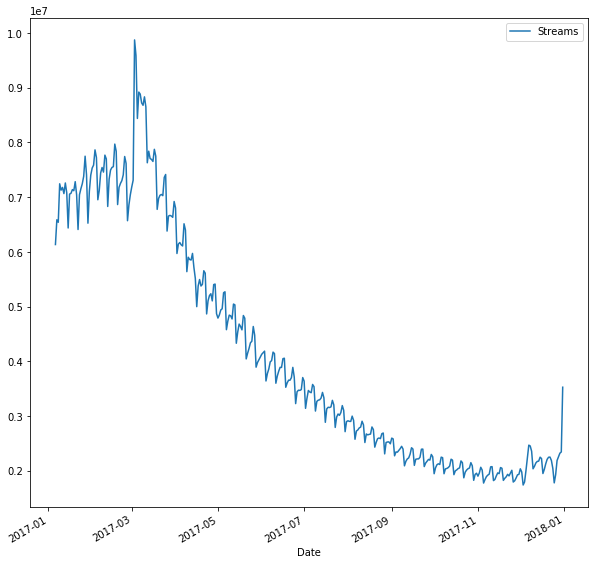

In [85]:
df_date[df_date['Artist_Trackname'] == 'Ed Sheeran Shape of You'].plot(kind='line', x='Date', y='Streams')